# 前言
+ 针对离散变量我们可以使用常见的条形图和饼图完成数据的可视化工作，那么，针对数值型变量，我们也有很多可视化的方法，例如箱线图、直方图、折线图、面积图、散点图等等。先来数值型变量的箱线图绘制。箱线图一般用来展现数据的分布（如上下四分位值、中位数等），同时，也可以用箱线图来反映数据的异常情况。

## boxplot函数的参数解读
### 绘图之前，我们先来讲解一下matplotlib包中boxplot函数的参数含义及使用方法：

plt.boxplot(x, notch=None, sym=None, vert=None, whis=None, positions=None, widths=None, patch_artist=None, meanline=None, showmeans=None, showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, meanprops=None, capprops=None, whiskerprops=None)

- x：指定要绘制箱线图的数据；

- notch：是否是凹口的形式展现箱线图，默认非凹口；

- sym：指定异常点的形状，默认为+号显示；

- vert：是否需要将箱线图垂直摆放，默认垂直摆放；

- whis：指定上下须与上下四分位的距离，默认为1.5倍的四分位差；

- positions：指定箱线图的位置，默认为[0,1,2…]；

- widths：指定箱线图的宽度，默认为0.5；

- patch_artist：是否填充箱体的颜色；

- meanline：是否用线的形式表示均值，默认用点来表示；

- showmeans：是否显示均值，默认不显示；

- showcaps：是否显示箱线图顶端和末端的两条线，默认显示；

- showbox：是否显示箱线图的箱体，默认显示；

- showfliers：是否显示异常值，默认显示；

- boxprops：设置箱体的属性，如边框色，填充色等；

- labels：为箱线图添加标签，类似于图例的作用；

- filerprops：设置异常值的属性，如异常点的形状、大小、填充色等；

- medianprops：设置中位数的属性，如线的类型、粗细等；

- meanprops：设置均值的属性，如点的大小、颜色等；

- capprops：设置箱线图顶端和末端线条的属性，如颜色、粗细等；

- whiskerprops：设置须的属性，如颜色、粗细、线的类型等；

## 生成随机数

在这里我们利用 numpy 库生成三组正态分布随机数:

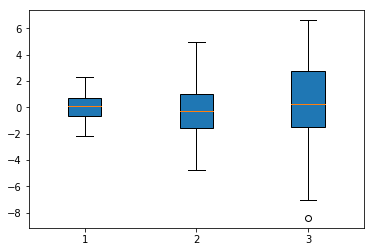

In [2]:
import matplotlib.pyplot as plt
import numpy as np
all_data=[np.random.normal(0,std,100) for std in range(1,4)]

figure,axes=plt.subplots() #得到画板、轴
axes.boxplot(all_data,patch_artist=True) #描点上色
plt.show() #展示

### plt.subplots 顾名思义是子图集合，当不指定 plt.subplots() 的 nrows 和 ncols 参数值时，默认只生成一张图。

### Note：默认 patch_artist=False，所以我们需要指定其参数值为 True，即可自动填充颜色。

## 多图输出

+ 有时我们会有把多张图放在同一行输出的对比需求，这时只需指定 plt.subplots() 函数的 nrows，ncols 参数值，举个例子，我想生成一个 2x3 的面板，即每一行放三张图，只需设定 nrows=2，ncols=3。

- 当然，你还可以通过参数 figsize 指定图形大小。

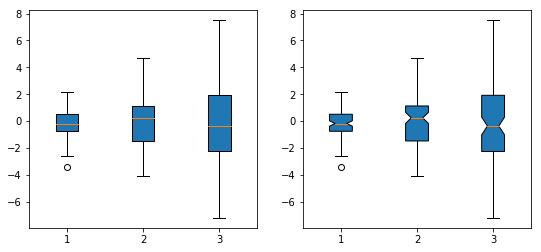

In [4]:
import matplotlib.pyplot as plt
import numpy as np
all_data=[np.random.normal(0,std,100) for std in range(1,4)]
#首先有图（fig），然后有轴（ax）
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(9,4))


bplot1=axes[0].boxplot(all_data,
                       vert=True,
                       patch_artist=True)

#axes[0]表示在第一张图的轴上描点画图
#vert=True表示boxplot图是竖着放的
#patch_artist=True 表示填充颜色

bplot2 = axes[1].boxplot(all_data,
                         notch=True,  # 切口形状
                         vert=True, 
                         patch_artist=True)
plt.show()

# 第一张图是矩形箱线图
# 第二张图是 notch 形状的箱线图
# 显然，把两张图放在同一行输出非常有利于对比观察图形差异。

## 1.1.4 美化图形

基本图形画得差不多了，接下来就只需要让它美化一下！

我们先来查看一下我们之前作出的箱线图对象的类型：

+ type(bplot1) 
+ #dict

返回字典字典类型

+ 颜色填充
颜值即正义！要选个好的配色不容易呢…

填充颜色基本遵循以下步骤：

+ 指定箱线图中每个箱子的填充颜色，如：red、green、blue、pink 等
构造字典存放箱子配色 —— {箱线图中每个箱子patch：对应的配色color}

+ 重新上色 —— patch.set_facecolor(color)

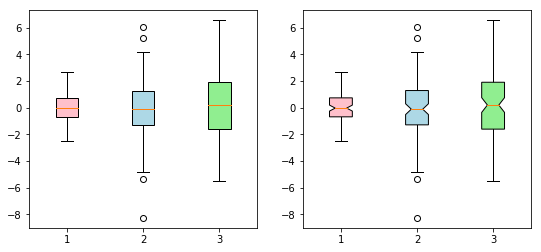

In [6]:
import matplotlib.pyplot as plt
import numpy as np

all_data=[np.random.normal(0,std,100) for std in range(1,4)]

#首先有图（fig），然后有轴（ax）
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(9,4))


bplot1=axes[0].boxplot(all_data,
                       vert=True,
                       patch_artist=True)


bplot2 = axes[1].boxplot(all_data,
                         notch=True,
                         vert=True, 
                         patch_artist=True)



#颜色填充
colors = ['pink', 'lightblue', 'lightgreen']
for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
        
plt.show()

### 添加网格线
#### 你可以：
+ 指定在x轴上添加网格线（ax.xaxis.grid(True)），或者在y轴上添加网格线（ax.yaxis.grid(True)）
+ 指定 x 轴和 y 轴上的刻度个数（ax.set_xticks([1,2,3]),ax.set_yticks([1,2,3,4,5,6,7,8])）
+ 设置 x 轴名称（ax.set_xlabel("xlabel")）
+ 设置 y 轴名称（ax.set_xlabel("ylabel")）

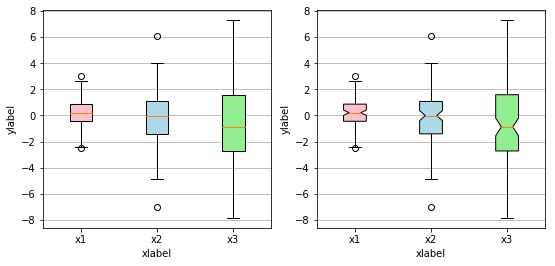

In [8]:
import matplotlib.pyplot as plt
import numpy as np

all_data=[np.random.normal(0,std,100) for std in range(1,4)]

#首先有图（fig），然后有轴（ax）
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(9,4))


bplot1=axes[0].boxplot(all_data,
                       vert=True,
                       patch_artist=True)


bplot2 = axes[1].boxplot(all_data,
                         notch=True,
                         vert=True, 
                         patch_artist=True)



#颜色填充
colors = ['pink', 'lightblue', 'lightgreen']
for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

# 加水平网格线
for ax in axes:
    ax.yaxis.grid(True) #在y轴上添加网格线
    ax.set_xticks([y+1 for y in range(len(all_data))] ) #指定x轴的轴刻度个数
    ## [y+1 for y in range(len(all_data))]运行结果是[1,2,3]
    ax.set_xlabel('xlabel') #设置x轴名称
    ax.set_ylabel('ylabel') #设置y轴名称

# 添加刻度
# 添加刻度名称，我们需要使用 plt.setp() 函数：

# 加刻度名称
plt.setp(axes, xticks=[1,2,3],
         xticklabels=['x1', 'x2', 'x3'])
# 我们的刻度数是哪些，以及我们想要它添加的刻度标签是什么。
        
plt.show()

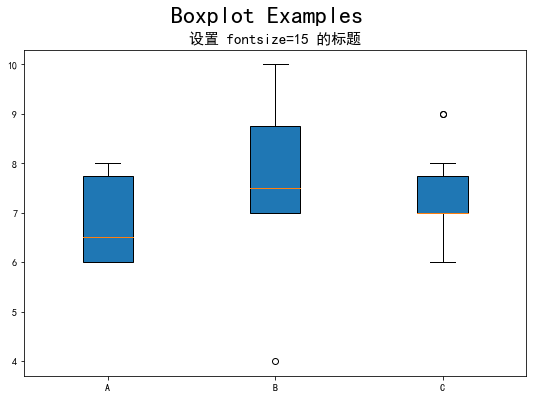

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# 添加标题
# 使用 ax.set_title 来设置单个图形主标题，用 fig.suptitle 来设置整张画板的标题：

data=np.random.binomial(n=10,p=0.76,size=(10,3))
labels=list("ABC")
fig,ax=plt.subplots(figsize=(9,6))
ax.boxplot(data,labels=labels,patch_artist=True)
plt.rcParams['font.sans-serif']=['SimHei'] #正确显示中文
plt.rcParams['axes.unicode_minus']=False #用来正确显示负号
ax.set_title("设置 fontsize=15 的标题",fontsize=15) #设置字体大小为15号字体
fig.suptitle("Boxplot Examples",fontsize=24)
plt.show()

# 想必细心的朋友已经发现了我在代码里偷偷加了两行设置字体的代码，这两行代码专为防止出现中文乱码而生！

# plt.rcParams['font.sans-serif']=['SimHei'] # 用来正确显示中文
# plt.rcParams['axes.unicode_minus']=False # 用来正确显示负号

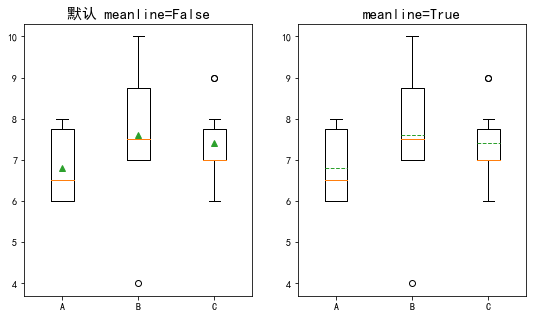

In [11]:
import matplotlib.pyplot as plt

# 其他参数
# 在图上标记出均值线

fig,axes=plt.subplots(1,2,figsize=(9,5))
axes[0].boxplot(data,labels=labels,showmeans=True,meanline=False)
axes[0].set_title("默认 meanline=False",fontsize=15)
axes[1].boxplot(data,labels=labels,showmeans=True,meanline=True)
axes[1].set_title("meanline=True",fontsize=15)
plt.show()

# Note：

# meanline=False，那么均值位置会在图中用小三角表示出来

# meanline=True，那么均值位置会在图中用虚线表示出来

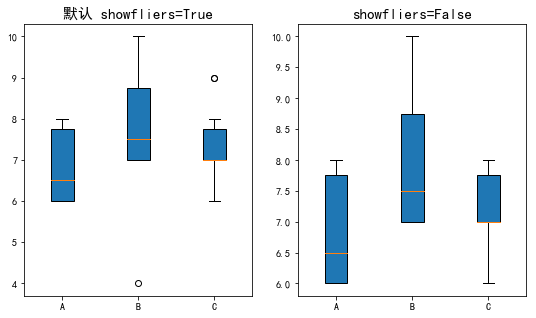

In [12]:
import matplotlib.pyplot as plt

# 在图上去除离群值

fig,axes=plt.subplots(1,2,figsize=(9,5))
axes[0].boxplot(data,labels=labels,patch_artist=True)
axes[0].set_title("默认 showfliers=True",fontsize=15)
axes[1].boxplot(data,labels=labels,patch_artist=True,showfliers=False)
axes[1].set_title("showfliers=False",fontsize=15)
plt.show()

# 默认 showfliers=True，那么图中会显示出离群值

# showfliers=False，那么图中会去除离群值